4000


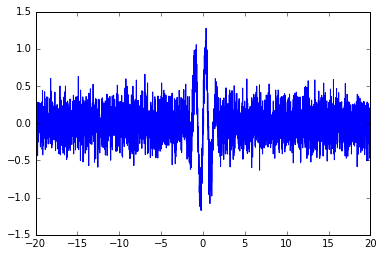

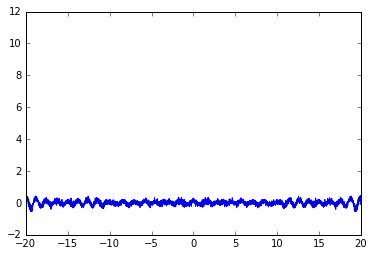

In [69]:
#!/usr/bin/python
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

def wavepacket(x, k, sigma):
    """This function creates a wavepacket on the interval defined by x with
    wavevector k and standard deviation sigma."""
    return np.sin(k*x) *  np.exp(-(x**2)/(2*sigma**2))
    #return np.sin(x)

def main():
    """This function sould call noisy_packet() to get a Gaussian wave
    packet, call clean_data() to apply a low pass filter to the data and
    finally plot the result."""
    max = 20
    N=0.01
    x=np.arange(-max,max,N)
    y=noisy_packet(x,5,1,0.2)
     
   
    y_clean = clean_data(x,y)
    
    
    print len(y_clean)
    

    plt.plot(x,y)
    plt.show()
    plt.plot(x,y_clean)
    plt.show()


def noisy_packet(x_values, k, sigma, noise_amplitude):
    """This function returns a noisy Gaussian wavepacket with wave
    vector k, standard deviation sigma and Gaussian noise of standard
    deviation noise_amplitude."""
    clean_y = wavepacket(x_values,k,sigma)
    noisy_y = clean_y + noise_amplitude*np.random.randn(len(x_values))
    return noisy_y

def clean_data(x_values,y_values):
    """This function should take a set of y_values, perform the Fourier
    transform on it, filter out the high frequency noise, transform the
    signal back into real space, and return it."""
    
    xf = np.fft.rfftfreq(len(x_values), d=0.01)
    yf = np.fft.rfft(y_values)
    for i in range(len(yf)):
        if yf[i]>xf[i]:
            yf[i]=xf[i]
    
    return np.fft.irfft(abs(yf))
    

main()  # calls your main function
